<h1>Decision Tree That Classifies a Team finsihing in the Top or bottom portion of the Table</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("soccer-standings.csv", index_col=0)
print(df)

                        Rank   P   M   W   D   L   G  GA  GD  Rank.1  ...  \
Team                                                                  ...   
Liverpool                  1  84  38  25   9   4  86  41  45       1  ...   
Arsenal                    2  74  38  20  14   4  69  34  35       5  ...   
Manchester City            3  71  38  21   8   9  72  44  28       2  ...   
Chelsea                    4  69  38  20   9   9  64  43  21       3  ...   
Newcastle United           5  66  38  20   6  12  68  47  21       6  ...   
Aston Villa                6  66  38  19   9  10  58  51   7       4  ...   
Nottingham Forest          7  65  38  19   8  11  58  46  12       7  ...   
Brighton & Hove Albion     8  61  38  16  13   9  66  59   7       8  ...   
AFC Bournemouth            9  56  38  15  11  12  58  46  12      10  ...   
Brentford                 10  56  38  16   8  14  66  57   9       9  ...   
Fulham                    11  54  38  15   9  14  54  54   0      11  ...   

In [3]:
df=df[["W", "D", "L", "GD"]]
norwich={"W":30, "D":7, "L":1, "GD":-8}
westbrom={"W":15, "D":21, "L":2, "GD":38}
df.loc["Norwich"]=norwich
df.loc["West Brom"]=westbrom
print(df)

                         W   D   L  GD
Team                                  
Liverpool               25   9   4  45
Arsenal                 20  14   4  35
Manchester City         21   8   9  28
Chelsea                 20   9   9  21
Newcastle United        20   6  12  21
Aston Villa             19   9  10   7
Nottingham Forest       19   8  11  12
Brighton & Hove Albion  16  13   9   7
AFC Bournemouth         15  11  12  12
Brentford               16   8  14   9
Fulham                  15   9  14   0
Crystal Palace          13  14  11   0
Everton                 11  15  12  -2
West Ham United         11  10  17 -16
Manchester United       11   9  18 -10
Wolverhampton           12   6  20 -15
Tottenham Hotspur       11   5  22  -1
Leicester City           6   7  25 -47
Ipswich Town             4  10  24 -46
Southampton              2   6  30 -60
Norwich                 30   7   1  -8
West Brom               15  21   2  38


In [4]:
def table_pos(x):
    if x>14:
        return 1
    else:
        return -1

df["Half"]=df["W"].apply(table_pos)
print(df)

                         W   D   L  GD  Half
Team                                        
Liverpool               25   9   4  45     1
Arsenal                 20  14   4  35     1
Manchester City         21   8   9  28     1
Chelsea                 20   9   9  21     1
Newcastle United        20   6  12  21     1
Aston Villa             19   9  10   7     1
Nottingham Forest       19   8  11  12     1
Brighton & Hove Albion  16  13   9   7     1
AFC Bournemouth         15  11  12  12     1
Brentford               16   8  14   9     1
Fulham                  15   9  14   0     1
Crystal Palace          13  14  11   0    -1
Everton                 11  15  12  -2    -1
West Ham United         11  10  17 -16    -1
Manchester United       11   9  18 -10    -1
Wolverhampton           12   6  20 -15    -1
Tottenham Hotspur       11   5  22  -1    -1
Leicester City           6   7  25 -47    -1
Ipswich Town             4  10  24 -46    -1
Southampton              2   6  30 -60    -1
Norwich   

In [5]:
from sklearn.model_selection import train_test_split

X=df[["W", "D", "L", "GD"]]
y=df[["Half"]]

print(X)
print(y)

                         W   D   L  GD
Team                                  
Liverpool               25   9   4  45
Arsenal                 20  14   4  35
Manchester City         21   8   9  28
Chelsea                 20   9   9  21
Newcastle United        20   6  12  21
Aston Villa             19   9  10   7
Nottingham Forest       19   8  11  12
Brighton & Hove Albion  16  13   9   7
AFC Bournemouth         15  11  12  12
Brentford               16   8  14   9
Fulham                  15   9  14   0
Crystal Palace          13  14  11   0
Everton                 11  15  12  -2
West Ham United         11  10  17 -16
Manchester United       11   9  18 -10
Wolverhampton           12   6  20 -15
Tottenham Hotspur       11   5  22  -1
Leicester City           6   7  25 -47
Ipswich Town             4  10  24 -46
Southampton              2   6  30 -60
Norwich                 30   7   1  -8
West Brom               15  21   2  38
                        Half
Team                        
Liverp

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4)

In [7]:
print(X_train)

                         W   D   L  GD
Team                                  
Manchester City         21   8   9  28
Manchester United       11   9  18 -10
AFC Bournemouth         15  11  12  12
Southampton              2   6  30 -60
Everton                 11  15  12  -2
Wolverhampton           12   6  20 -15
Aston Villa             19   9  10   7
Liverpool               25   9   4  45
Tottenham Hotspur       11   5  22  -1
Arsenal                 20  14   4  35
Brentford               16   8  14   9
Norwich                 30   7   1  -8
Brighton & Hove Albion  16  13   9   7


In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred=classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print("ACCURACY: ", accuracy_score(y_test, y_pred))

[[4 0]
 [0 5]]
ACCURACY:  1.0


In [11]:
print(y_test)
print(y_pred)

                   Half
Team                   
Leicester City       -1
Chelsea               1
West Brom             1
Nottingham Forest     1
Crystal Palace       -1
Newcastle United      1
West Ham United      -1
Fulham                1
Ipswich Town         -1
[-1  1  1  1 -1  1 -1  1 -1]


In [12]:
from sklearn import tree
text_representation=tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= 13.50
|   |--- class: -1
|--- feature_0 >  13.50
|   |--- class: 1



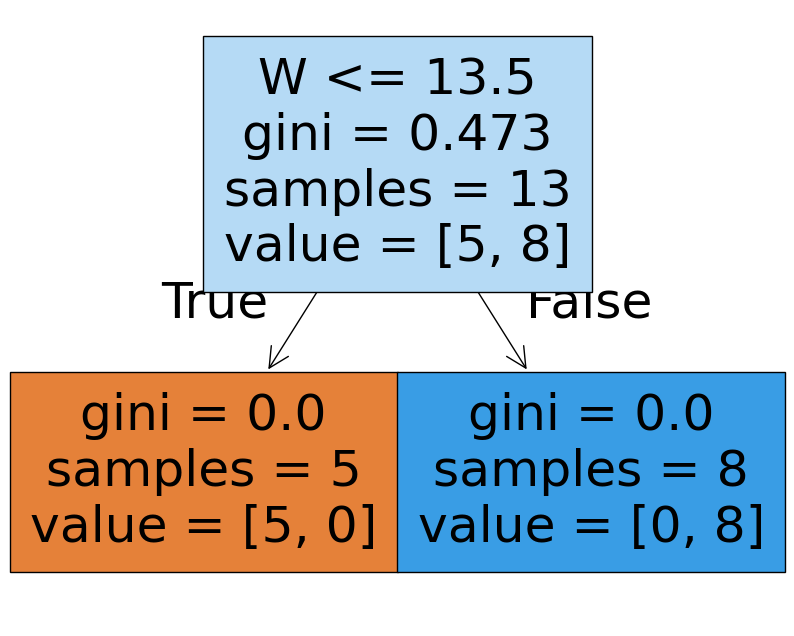

In [13]:
fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(classifier, feature_names=df.columns, filled=True)